# 2023-09-11 Exam: Association Rules

1. Read the dataset, show its head, shape and description

2. Eliminate totally null columns and totally null rows, eliminate columns
with less than 1/3 of non null values; fill the remaining NaN values with
the mean of the column (2pt)

3. Drop Time, convert Date from string to datetime and group by Date
using mean as aggregate function (2pt)

4. Preparation of the boolean matrix (3pt)

    • Discretise continuous values with two bins, kmeans strategy and
onehot-dense encoding

    • Discretization/encoding generates 0/1 values; convert the binary
values obtained into boolean, as requested by Apriori

5. Set the names of two columns generated by the discretisation of each
attribute A to A_low, A_high (with discretisation/one-hot-encoding,
each original column generates two columns, the first is for the low values, the second for the high values) (3pt)

6. find a value of min_support such that the Apriori algorithm generates
at least 8 frequent itemsets with at least 2 items, output the result (3pt)

7. find the minimum metric threshold such that at least 100 association
rules are extracted from the frequent itemsets found and show the metrics used and the best 10 rules by descending confidence and support
(3pt)


In [234]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

url = 'AirQualityUCI.csv'
random_state = 42

## 1. Read the dataset, show its head, shape and description




In [235]:
df = pd.read_csv(url, sep=';')
print('Dataframe shape is: {}'.format(df.shape))
df.head()

Dataframe shape is: (9471, 18)


,Date,Time,X00,X01,X02,X03,X04,X05,X06,X07,X08,X09,X10,X11,X12,X13,X14,X15
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN,NaN
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN,NaN
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN,NaN
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN,NaN
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN,NaN


In [236]:
df.describe()

,X00,X01,X02,X03,X04,X05,X06,X07,X08,X09,X10,X11,X12,X13,X14,X15
count,7765.000000,8991.000000,914.000000,9357.000000,8991.000000,7718.000000,8991.000000,7715.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,0.0,0.0,0.0
mean,2.127521,1099.833166,218.811816,9.688704,939.153376,246.896735,835.493605,113.091251,1456.264598,1022.906128,18.317829,49.234201,1.025530,NaN,NaN,NaN
std,1.463171,217.080037,204.459921,7.559785,266.831429,212.979168,256.817320,48.370108,346.206794,398.484288,8.832116,17.316892,0.403813,NaN,NaN,NaN
min,0.000000,647.000000,7.000000,0.000000,383.000000,2.000000,322.000000,2.000000,551.000000,221.000000,-1.900000,9.200000,0.184700,NaN,NaN,NaN
25%,1.000000,937.000000,67.000000,4.000000,734.500000,98.000000,658.000000,78.000000,1227.000000,731.500000,11.800000,35.800000,0.736800,NaN,NaN,NaN
50%,1.800000,1063.000000,150.000000,7.900000,909.000000,180.000000,806.000000,109.000000,1463.000000,963.000000,17.800000,49.600000,0.995400,NaN,NaN,NaN
75%,2.900000,1231.000000,297.000000,13.600000,1116.000000,326.000000,969.500000,142.000000,1674.000000,1273.500000,24.400000,62.500000,1.313700,NaN,NaN,NaN
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000,NaN,NaN,NaN


## 2. Eliminate totally null columns and totally null rows, eliminate columns with less than 1/3 of non null values; fill the remaining NaN values with the mean of the column (2pt)



In [237]:
prev_shape = df.shape
df.dropna(axis=0, how='all', inplace=True)
df.dropna(axis=1, how='all', inplace=True)
print('Removed {} rows and {} cols containing totally null values'.format(prev_shape[0]-df.shape[0], prev_shape[1]-df.shape[1]))
print('New shape is ', df.shape)
df.head()

Removed 114 rows and 3 cols containing totally null values
New shape is  (9357, 15)


,Date,Time,X00,X01,X02,X03,X04,X05,X06,X07,X08,X09,X10,X11,X12
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [238]:
cols_to_remove = []
for i in df.columns:
    if(df[i].count() < df.shape[0]/3):
        cols_to_remove.append(i)
print('Removing cols ', cols_to_remove)
df.drop(columns=cols_to_remove, axis=1, inplace=True)
print('New shape is ', df.shape)

Removing cols  ['X02']
New shape is  (9357, 14)


In [239]:
for i in df.columns:
    if(type(df[i][0]) != str):
        mean = np.mean(df[i])
        print('-'*40)
        print('Filling NaN values in {} col with mean of column ({})'.format(i, mean))
        df[i].fillna(mean, inplace=True)


----------------------------------------
Filling NaN values in X00 col with mean of column (2.1275209272376046)
----------------------------------------
Filling NaN values in X01 col with mean of column (1099.8331664998332)
----------------------------------------
Filling NaN values in X03 col with mean of column (9.688703644330449)
----------------------------------------
Filling NaN values in X04 col with mean of column (939.1533755978201)
----------------------------------------
Filling NaN values in X05 col with mean of column (246.8967349054159)
----------------------------------------
Filling NaN values in X06 col with mean of column (835.4936047158269)
----------------------------------------
Filling NaN values in X07 col with mean of column (113.09125081011017)
----------------------------------------
Filling NaN values in X08 col with mean of column (1456.2645979312647)
----------------------------------------
Filling NaN values in X09 col with mean of column (1022.90612835057

## 3. Drop Time, convert Date from string to datetime and group by Date using mean as aggregate function (2pt)



In [240]:
import datetime
df.drop(columns='Time', inplace=True)

In [241]:
for i in range(0, int(df.shape[0])):
    date_arr = df['Date'][i].split('/')
    date_arr = [int(d) for d in date_arr]
    df['Date'][i]  = datetime.date(day=date_arr[0], month=date_arr[1], year=date_arr[2])
df

,Date,X00,X01,X03,X04,X05,X06,X07,X08,X09,X10,X11,X12
0,2004-03-10,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2004-03-10,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2004-03-10,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2004-03-10,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,2004-03-10,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,2005-04-04,3.1,1314.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
9353,2005-04-04,2.4,1163.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9354,2005-04-04,2.4,1142.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9355,2005-04-04,2.1,1003.0,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139


## 4. Preparation of the boolean matrix (3pt)

    • Discretise continuous values with two bins, kmeans strategy and onehot-dense encoding

    • Discretization/encoding generates 0/1 values; convert the binary values obtained into boolean, as requested by Apriori



In [242]:
from sklearn.preprocessing import KBinsDiscretizer

discretizer = KBinsDiscretizer(n_bins=2, encode='onehot-dense', strategy='kmeans', dtype=np.float32, random_state=random_state)

continous_columns = ['X00','X01','X03','X04','X05','X06','X07','X08','X09','X10','X11','X12']
boolean_matrix = pd.DataFrame()
boolean_matrix[discretizer.get_feature_names_out()] = discretizer.fit_transform(df[continous_columns]).astype(bool)
boolean_matrix

,X00_0.0,X00_1.0,X01_0.0,X01_1.0,X03_0.0,X03_1.0,X04_0.0,X04_1.0,X05_0.0,X05_1.0,...,X08_0.0,X08_1.0,X09_0.0,X09_1.0,X10_0.0,X10_1.0,X11_0.0,X11_1.0,X12_0.0,X12_1.0
0,True,False,False,True,True,False,False,True,True,False,...,False,True,False,True,True,False,False,True,True,False
1,True,False,False,True,True,False,True,False,True,False,...,False,True,True,False,True,False,True,False,True,False
2,True,False,False,True,True,False,True,False,True,False,...,False,True,True,False,True,False,False,True,True,False
3,True,False,False,True,True,False,True,False,True,False,...,False,True,False,True,True,False,False,True,True,False
4,True,False,False,True,True,False,True,False,True,False,...,False,True,True,False,True,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,False,True,False,True,False,True,False,True,False,True,...,True,False,False,True,False,True,True,False,True,False
9353,True,False,True,False,True,False,False,True,True,False,...,True,False,False,True,False,True,True,False,True,False
9354,True,False,True,False,True,False,False,True,True,False,...,True,False,True,False,False,True,True,False,True,False
9355,True,False,True,False,True,False,True,False,True,False,...,True,False,True,False,False,True,True,False,True,False


## 5. Set the names of two columns generated by the discretisation of each attribute A to A_low, A_high (with discretisation/one-hot-encoding, each original column generates two columns, the first is for the low values, the second for the high values) (3pt)



In [243]:
col_new_names = {}
for c in boolean_matrix.columns:
    prefix, suffix = c.split('_')
    if(suffix == '0.0'):
        s = f'{prefix}_low'
    else:
        s = f'{prefix}_high'
    col_new_names[c] = s
boolean_matrix.rename(columns=col_new_names, inplace=True)     
boolean_matrix

,X00_low,X00_high,X01_low,X01_high,X03_low,X03_high,X04_low,X04_high,X05_low,X05_high,...,X08_low,X08_high,X09_low,X09_high,X10_low,X10_high,X11_low,X11_high,X12_low,X12_high
0,True,False,False,True,True,False,False,True,True,False,...,False,True,False,True,True,False,False,True,True,False
1,True,False,False,True,True,False,True,False,True,False,...,False,True,True,False,True,False,True,False,True,False
2,True,False,False,True,True,False,True,False,True,False,...,False,True,True,False,True,False,False,True,True,False
3,True,False,False,True,True,False,True,False,True,False,...,False,True,False,True,True,False,False,True,True,False
4,True,False,False,True,True,False,True,False,True,False,...,False,True,True,False,True,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,False,True,False,True,False,True,False,True,False,True,...,True,False,False,True,False,True,True,False,True,False
9353,True,False,True,False,True,False,False,True,True,False,...,True,False,False,True,False,True,True,False,True,False
9354,True,False,True,False,True,False,False,True,True,False,...,True,False,True,False,False,True,True,False,True,False
9355,True,False,True,False,True,False,True,False,True,False,...,True,False,True,False,False,True,True,False,True,False


## 6. find a value of min_support such that the Apriori algorithm generates at least 8 frequent itemsets with at least 2 items, output the result (3pt)



In [244]:
from mlxtend.frequent_patterns import apriori
min_itemsets = 8
min_items_in_itemset = 2

min_support = 0

for support in np.arange(1, 0.01, -0.01):
    print('Trying support: {:.2f}..'.format(support))
    frequent_itemset = apriori(boolean_matrix, min_support=support, use_colnames=True)
    cond_itemset = [len(itemset) > min_items_in_itemset for itemset in frequent_itemset.itemsets]
    if(sum(cond_itemset) > min_itemsets):
        min_support=support
        break

if(min_support == 0):
    print('Found nothing!')
else:
    print('max min_support: {:.2f}\tnum itemset with at least {} items: {}'.format(min_support, min_items_in_itemset, len(cond_itemset)))

Trying support: 1.00..
Trying support: 0.99..
Trying support: 0.98..
Trying support: 0.97..
Trying support: 0.96..
Trying support: 0.95..
Trying support: 0.94..
Trying support: 0.93..
Trying support: 0.92..
Trying support: 0.91..
Trying support: 0.90..
Trying support: 0.89..
Trying support: 0.88..
Trying support: 0.87..
Trying support: 0.86..
Trying support: 0.85..
Trying support: 0.84..
Trying support: 0.83..
Trying support: 0.82..
Trying support: 0.81..
Trying support: 0.80..
Trying support: 0.79..
Trying support: 0.78..
Trying support: 0.77..
Trying support: 0.76..
Trying support: 0.75..
Trying support: 0.74..
Trying support: 0.73..
Trying support: 0.72..
Trying support: 0.71..
Trying support: 0.70..
Trying support: 0.69..
Trying support: 0.68..
Trying support: 0.67..
Trying support: 0.66..
Trying support: 0.65..
Trying support: 0.64..
Trying support: 0.63..
Trying support: 0.62..
Trying support: 0.61..
max min_support: 0.61	num itemset with at least 2 items: 41


## 7. find the minimum metric threshold such that at least 100 association rules are extracted from the frequent itemsets found and show the metrics used and the best 10 rules by descending confidence and support (3pt)

In [245]:
from mlxtend.frequent_patterns import association_rules

min_association_rules = 10
min_metric_threshold = 0

for metric_threshold in np.arange(3, 0.01, -0.01):
    print('Trying metric: {:.2f}..'.format(metric_threshold))
    rules = association_rules(frequent_itemset, min_threshold=metric_threshold, metric='lift')
    if(rules.shape[0] > min_association_rules):
        min_metric_threshold = metric_threshold
        break

if(min_metric_threshold == 0):
    print('Found nothing!')
else:
    print('min_metric_threshold: {:.2f}\tnum rules found: {}'.format(min_metric_threshold, len(rules)))

Trying metric: 3.00..
Trying metric: 2.99..
Trying metric: 2.98..
Trying metric: 2.97..
Trying metric: 2.96..
Trying metric: 2.95..
Trying metric: 2.94..
Trying metric: 2.93..
Trying metric: 2.92..
Trying metric: 2.91..
Trying metric: 2.90..
Trying metric: 2.89..
Trying metric: 2.88..
Trying metric: 2.87..
Trying metric: 2.86..
Trying metric: 2.85..
Trying metric: 2.84..
Trying metric: 2.83..
Trying metric: 2.82..
Trying metric: 2.81..
Trying metric: 2.80..
Trying metric: 2.79..
Trying metric: 2.78..
Trying metric: 2.77..
Trying metric: 2.76..
Trying metric: 2.75..
Trying metric: 2.74..
Trying metric: 2.73..
Trying metric: 2.72..
Trying metric: 2.71..
Trying metric: 2.70..
Trying metric: 2.69..
Trying metric: 2.68..
Trying metric: 2.67..
Trying metric: 2.66..
Trying metric: 2.65..
Trying metric: 2.64..
Trying metric: 2.63..
Trying metric: 2.62..
Trying metric: 2.61..
Trying metric: 2.60..
Trying metric: 2.59..
Trying metric: 2.58..
Trying metric: 2.57..
Trying metric: 2.56..
Trying met

In [246]:
rules.sort_values(by=['confidence', 'support'], ascending=False, inplace=True)
rules.reset_index(drop=True, inplace=True)
rules[:10]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(X04_low),(X03_low),0.639201,0.716469,0.639201,1.000000,1.395734,0.181233,inf,0.785841
1,"(X04_low, X00_low)",(X03_low),0.623704,0.716469,0.623704,1.000000,1.395734,0.176839,inf,0.753479
2,"(X05_low, X04_low)",(X03_low),0.617292,0.716469,0.617292,1.000000,1.395734,0.175021,inf,0.740855
3,"(X05_low, X04_low, X00_low)",(X03_low),0.613658,0.716469,0.613658,1.000000,1.395734,0.173991,inf,0.733887
4,"(X05_low, X04_low)","(X03_low, X00_low)",0.617292,0.694133,0.613658,0.994114,1.432166,0.185176,51.961451,0.788478
5,"(X04_low, X00_low)","(X05_low, X03_low)",0.623704,0.682804,0.613658,0.983893,1.440959,0.187790,19.693128,0.813237
6,(X04_low),"(X03_low, X00_low)",0.639201,0.694133,0.623704,0.975757,1.405720,0.180014,12.616497,0.799949
7,(X04_low),"(X05_low, X03_low)",0.639201,0.682804,0.617292,0.965725,1.414351,0.180843,9.254377,0.811980
8,(X04_low),"(X05_low, X03_low, X00_low)",0.639201,0.676819,0.613658,0.960040,1.418458,0.181035,8.087626,0.817654
9,"(X05_low, X03_low, X00_low)",(X04_low),0.676819,0.639201,0.613658,0.906679,1.418458,0.181035,3.866231,0.912831


<Axes: >

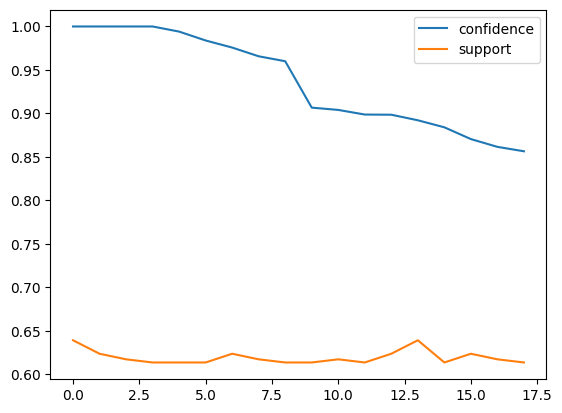

In [247]:
rules[['confidence','support']].plot()

<Axes: xlabel='confidence', ylabel='support'>

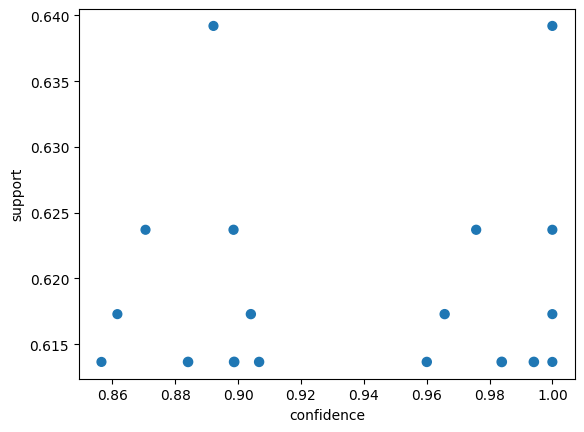

In [248]:
rules.plot.scatter(x='confidence', y='support', s=[14**n for n in rules.lift])